Improve performace of the tree.  By only using a max depth of 4, performance increased.  Dropping BloodPressure and SkinThickness also improved performace slightly (based on previous models).  Oversampling using SMOTE may also improve performace, but I did not try that.

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop(['Outcome','BloodPressure', 'SkinThickness'], axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [3]:
# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 4,random_state=42)

In [4]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[87 13]
 [16 38]]


In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       100
           1       0.75      0.70      0.72        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



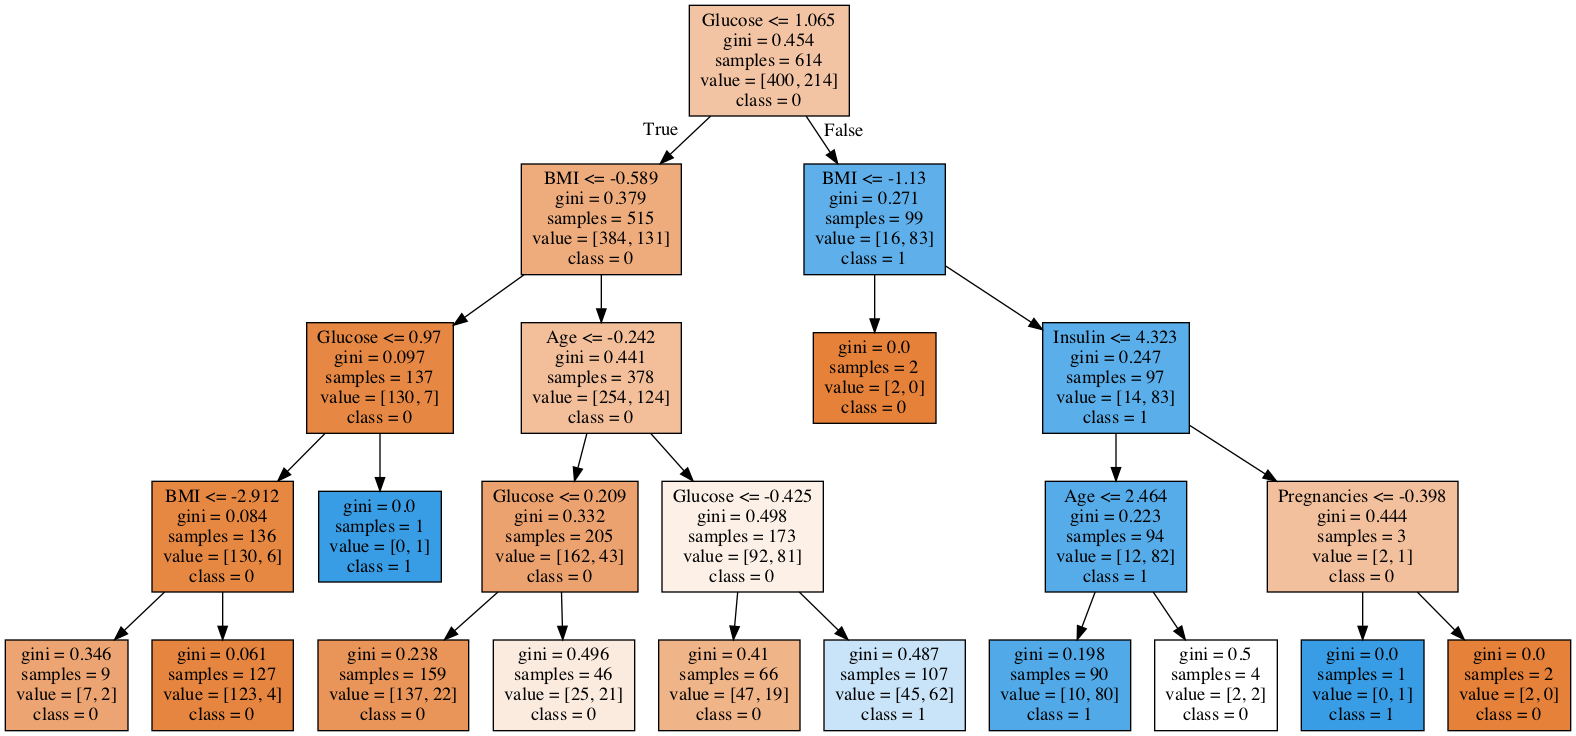

In [7]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)


Example input:
[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ] Example output:
Nichole, Tanisha & Maggie

In [8]:
def newNames(names):
# Function takes a list of names in a dictionary style
# returns a string
    #first pull names out of dictionaries to new lists
    newList = list(map(lambda d : d['name'], names))
    if len(newList) == 1:
        return newList[0]
    if len(newList) == 2:
        return newList[0] + ' & ' + newList[1]
    # for more than 3 names
    newString = ''
    counter = len(newList)
    for i in range(counter-2):
        newString += newList[i] + ', '
    newString += newList[counter-2] + ' & ' + newList[counter-1]
    return newString

In [9]:
test =  [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]
print(newNames(test))

Nichole, Tanisha & Maggie


In [10]:
myDict = [{'name': 'me'}, {'name': 'test'}]
print(newNames(myDict))

me & test


In [11]:
print(newNames([{'name': 'One'}]))

One


In [12]:
test =  [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}, 
         {'name': 'me'}, {'name': 'test'} ]
print(newNames(test))

Nichole, Tanisha, Maggie, me & test
